In [ ]:
import torch.utils.tensorboard as tensorboard
run_dir = ''
stats_tfevents = tensorboard.SummaryWriter(run_dir)

### Test Dataset (adding det)

In [19]:
from datasets import dataset_512
import importlib
importlib.reload(dataset_512)

res = 256
# dpath = '/media/nnthao/MAT/Data/CelebA-HQ/CelebA-HQ-img/'
dpath = '/home/nnthao/lntuong/FDA/test_sets/CelebA-HQ/images3'
D = dataset_512.ImageFolderMaskDataset(path=dpath, det_path='/media/nnthao/MAT/label_yolo/CelebA-HQ/CelebA-HQ-img/', xflip=True)
print(D.__len__())
for i in range(D.__len__()):
    print(i)
    a, b, c, d = D.__getitem__(i)
    if a.shape != (3, 512, 512):
        print(i, a.shape)

32
0
0 (4, 512, 512)
1
1 (4, 512, 512)
2
2 (4, 512, 512)
3
3 (4, 512, 512)
4
4 (4, 512, 512)
5
5 (4, 512, 512)
6
6 (4, 512, 512)
7
7 (4, 512, 512)
8
8 (4, 512, 512)
9
9 (4, 512, 512)
10
10 (4, 512, 512)
11
11 (4, 512, 512)
12
12 (4, 512, 512)
13
13 (4, 512, 512)
14
14 (4, 512, 512)
15
15 (4, 512, 512)
16
16 (4, 512, 512)
17
17 (4, 512, 512)
18
18 (4, 512, 512)
19
19 (4, 512, 512)
20
20 (4, 512, 512)
21
21 (4, 512, 512)
22
22 (4, 512, 512)
23
23 (4, 512, 512)
24
24 (4, 512, 512)
25
25 (4, 512, 512)
26
26 (4, 512, 512)
27
27 (4, 512, 512)
28
28 (4, 512, 512)
29
29 (4, 512, 512)
30
30 (4, 512, 512)
31
31 (4, 512, 512)


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# a = D._load_raw_det(15)
a = D.__getitem__(16)[3].transpose(1, 2, 0)
plt.imsave('det.png', np.concatenate((a, a, a), axis=2))

### Test-case MAT+yolo

In [1]:
import matplotlib.image as mpimg
from _my_utils import *

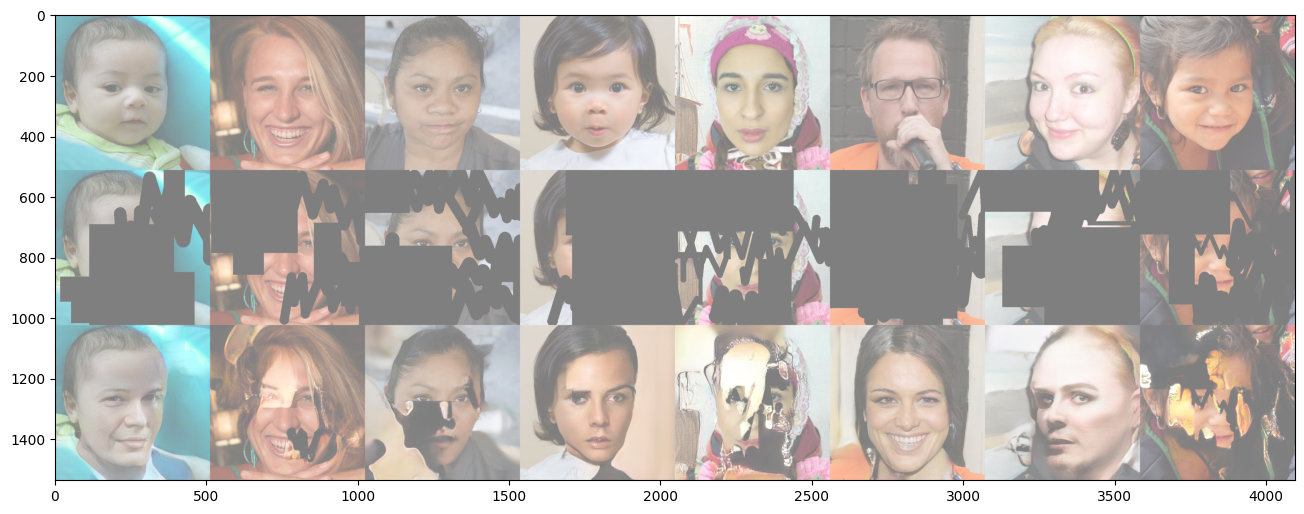

In [10]:
dpath = 'test_sets/CelebA-HQ/images3/'
mpath = 'test_sets/CelebA-HQ/masks3/'
outdir = 'test_sets/CelebA-HQ/samples3/'

full_imgs = []

for i in range(8):
    full_imgs.append(mpimg.imread(dpath + str(i) + '.png')[..., :-1])
for i in range(8):
    img = mpimg.imread(dpath + str(i) + '.png')[..., :-1]
    mask = mpimg.imread(mpath + str(i) + '.png')[..., :-1]
    full_imgs.append(img * mask)
for i in range(8):
    full_imgs.append(mpimg.imread(outdir + str(i) + '.png'))

plot_images(np.array(full_imgs), 'rectangle', (3, 8))